# King County Housing Data
Predicting Housing Prices Near Seattle

# Data Exploration

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats.stats import pearsonr
pd.set_option('display.max_columns', None)

%matplotlib inline
df_train = pd.read_csv("kc_house_data.csv")
sns.set_style('darkgrid')
print(df_train.shape)
df_train.head()

(21613, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Let's take a list of the features and curate the dataframe to the ones we want

In [2]:
cols = list(df_train.columns.values)

cols

['id',
 'date',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [28]:
df_train = df_train[cols[2:]]
df_train.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# This is the SweetViz module. Will be shown in the PNG folder

In [29]:
#importing sweetviz
import sweetviz as sv

#analyzing the dataset
house_report = sv.analyze(df_train)

#display the report
house_report.show_html('KC_Housing_Report.html')


:FEATURES DONE:                    |█████████████████████| [100%]   00:14  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:01  -> (00:00 left)


Creating Associations graph... DONE!
Report KC_Housing_Report.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.


### The readout says there are 5 duplicates, so let's remove them


In [3]:
df_train = df_train.drop_duplicates( keep='last')
df_train.shape

(21613, 21)

### Let's check to see if there are any null values

In [4]:
df_train.isna().sum()


id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

There are no null values. This makes the process easier.

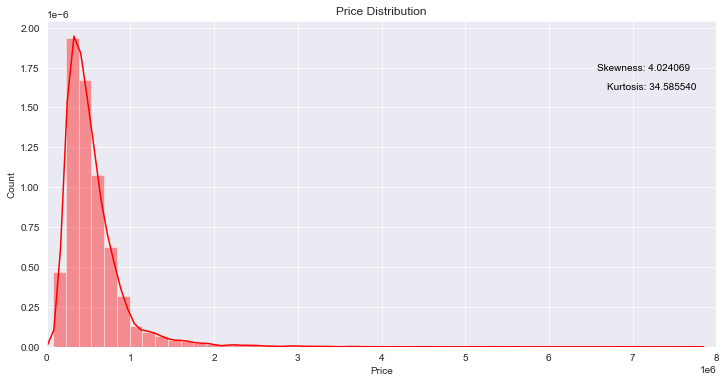

In [5]:
#histogram
fig, ax = plt.subplots(figsize = (12,6))
sns.distplot(df_train['price'], bins=50, color = 'r')
ax.set(xlim=[0, 8000000], xlabel='Price', ylabel='Count',
       title='Price Distribution')
ax.annotate("Skewness: %f" % (df_train['price']).skew(),color = 'k',
            xy=(800,130), xycoords='figure points',
            xytext=(.96, 0.87), textcoords='axes fraction',
            horizontalalignment='right', verticalalignment='top')
ax.annotate("Kurtosis: %f" % (df_train['price']).kurt(),color = 'k',
            xy=(800,130), xycoords='figure points',
            xytext=(.97, 0.81), textcoords='axes fraction',
            horizontalalignment='right', verticalalignment='top')
plt.savefig('PNG/price_distribution.png', bbox_inches = 'tight',pad_inches = 0)

In [6]:
print("Skewness: %f" % (df_train['price']).skew())
print("Kurtosis: %f" % (df_train['price']).kurt())

Skewness: 4.024069
Kurtosis: 34.585540


Price is not normally distributed. Going to try a natural log transformation to see if it helps

Text(0.97, 0.81, 'Kurtosis: 0.691854')

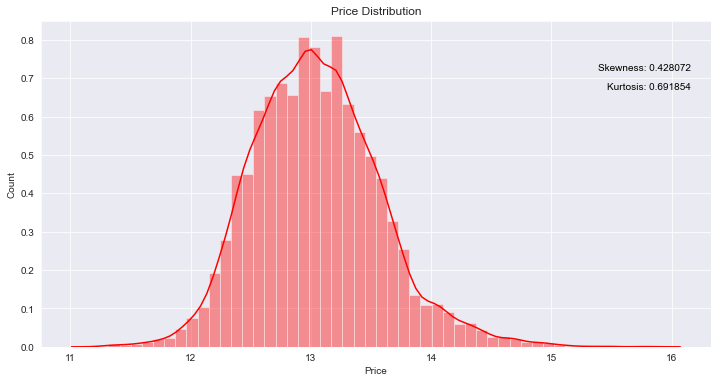

In [7]:
fig, ax = plt.subplots(figsize = (12,6))
sns.distplot(np.log(df_train['price']), bins=50, color = 'r')
ax.set( xlabel='Price', ylabel='Count',
       title='Price Distribution')
ax.annotate("Skewness: %f" % (np.log(df_train['price'])).skew(),color = 'k',
            xy=(800,130), xycoords='figure points',
            xytext=(.97, 0.87), textcoords='axes fraction',
            horizontalalignment='right', verticalalignment='top')
ax.annotate("Kurtosis: %f" % (np.log(df_train['price'])).kurt(),color = 'k',
            xy=(800,130), xycoords='figure points',
            xytext=(.97, 0.81), textcoords='axes fraction',
            horizontalalignment='right', verticalalignment='top')
#plt.savefig('PNG/log_price_distribution.png', bbox_inches = 'tight',pad_inches = 0)

In [8]:
print("Skewness: %f" % (np.log(df_train['price'])).skew())
print("Kurtosis: %f" % (np.log(df_train['price'])).kurt())

Skewness: 0.428072
Kurtosis: 0.691854


Much better. 

In [9]:
df_train.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [10]:
df_train[df_train['bedrooms'].eq(33)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15870,2402100895,20140625T000000,640000.0,33,1.75,1620,6000,1.0,0,0,5,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700


There are many anomalies, including : bedrooms (max), sqft_living (max), sqft_lot (max), grade (max), sqft_above (max), sqft_basement (max), sqft_living15 (max), sqft_lot15 (max)

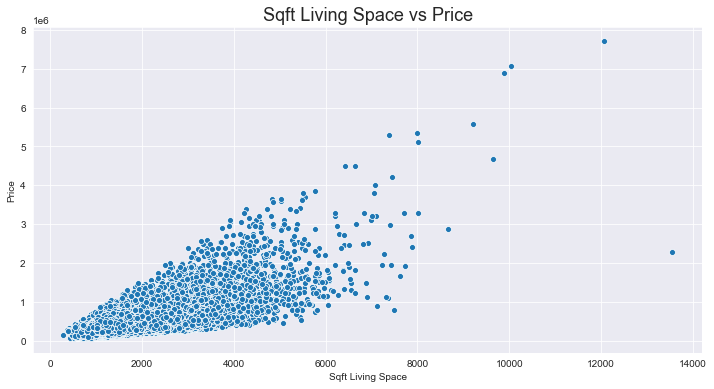

In [11]:
var = 'sqft_living'
fig, axe = plt.subplots(figsize = (12,6))
sns.scatterplot(data = df_train, x = df_train[var], y = df_train['price'])
axe.set_title('Sqft Living Space vs Price', fontdict = {'fontsize' : 18})
axe.set_ylabel('Price')
axe.set_xlabel('Sqft Living Space')
plt.show()

There is a clear relationship between price and living space.

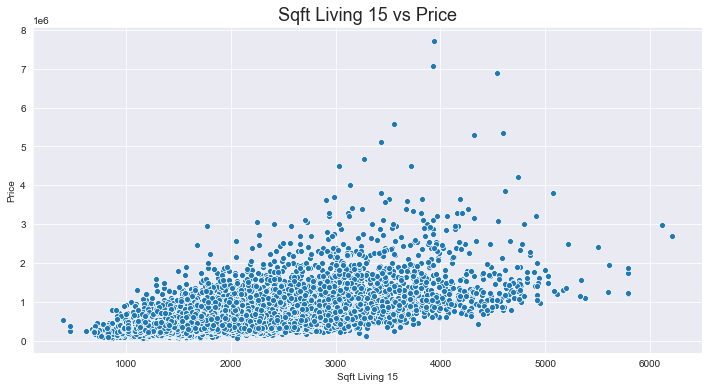

In [12]:
var = 'sqft_living15'
fig, axe = plt.subplots(figsize = (12,6))
sns.scatterplot(data = df_train, x = df_train[var], y = df_train['price'])
axe.set_title('Sqft Living 15 vs Price', fontdict = {'fontsize' : 18})
axe.set_ylabel('Price')
axe.set_xlabel('Sqft Living 15')
plt.show()

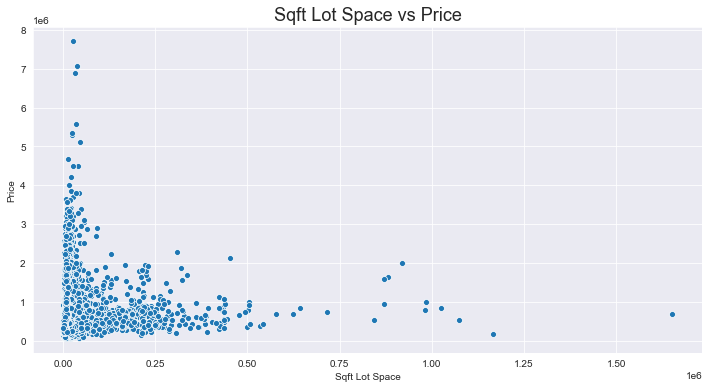

In [13]:
var = 'sqft_lot'
fig, axe = plt.subplots(figsize = (12,6))
sns.scatterplot(data = df_train, x = df_train[var], y = df_train['price'])
axe.set_title('Sqft Lot Space vs Price', fontdict = {'fontsize' : 18})
axe.set_ylabel('Price')
axe.set_xlabel('Sqft Lot Space')
plt.show()

There doesn't seem to be the same relationship for the lot size. 

Let's try this for all of them at the same time. 

In [15]:
df_train.columns.values

array(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype=object)

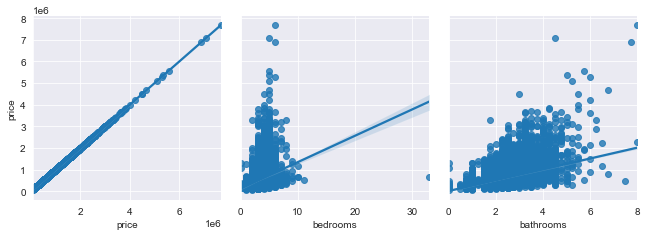

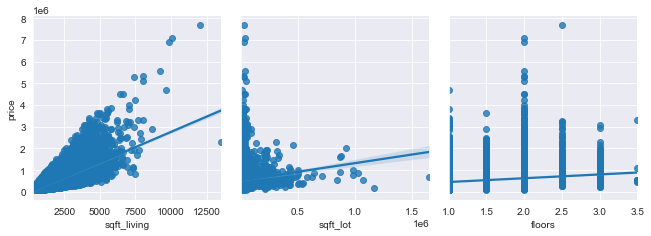

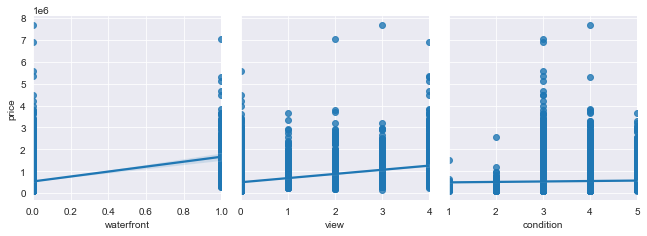

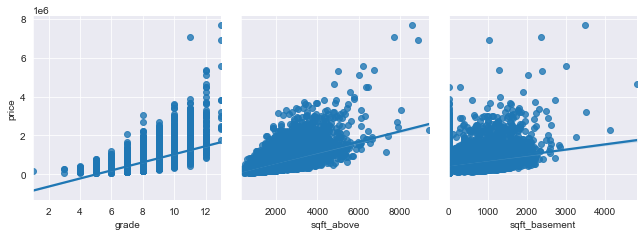

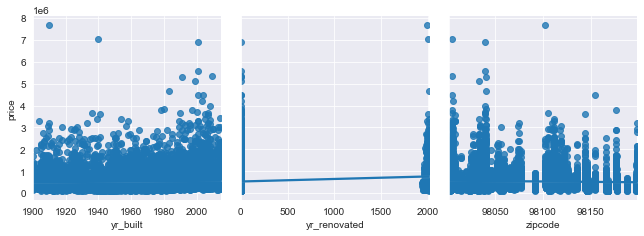

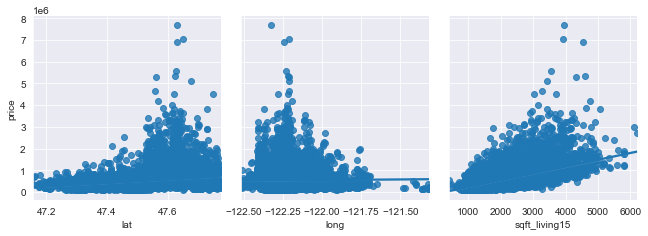

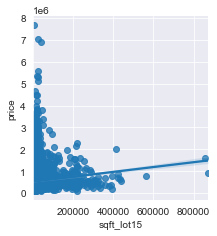

In [16]:
features = ['price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']

n = 3
row_groups= [features[i:i+n] for i in range(0, len(features), n) ]

for i in row_groups:
    pp = sns.pairplot(data=df_train, y_vars=['price'],x_vars=i, kind="reg", height=3)

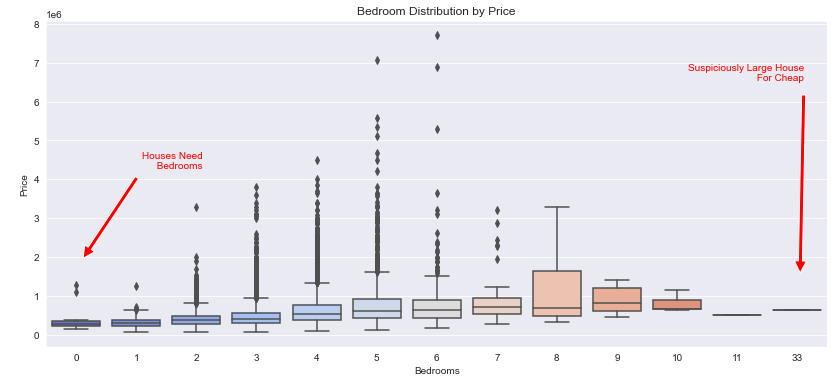

In [17]:
var = 'bedrooms'
fig, ax = plt.subplots(figsize=(14, 6))
sns.boxplot(x=var, y="price", data=df_train, palette='coolwarm')
ax.annotate('Suspiciously Large House\n For Cheap',color = 'r',
            xy=(800,100), xycoords='figure points',
            xytext=(.97, 0.87), textcoords='axes fraction',
            arrowprops=dict(facecolor='r', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')
ax.annotate('Houses Need\n Bedrooms',color = 'r',
            xy=(80,120), xycoords='figure points',
            xytext=(.2, 0.6), textcoords='axes fraction',
            arrowprops=dict(facecolor='r', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')
ax.set(xlabel='Bedrooms', ylabel='Price',title='Bedroom Distribution by Price')
plt.savefig('PNG/annotated_bedrooms_distribution.png', bbox_inches = 'tight',pad_inches = 0)

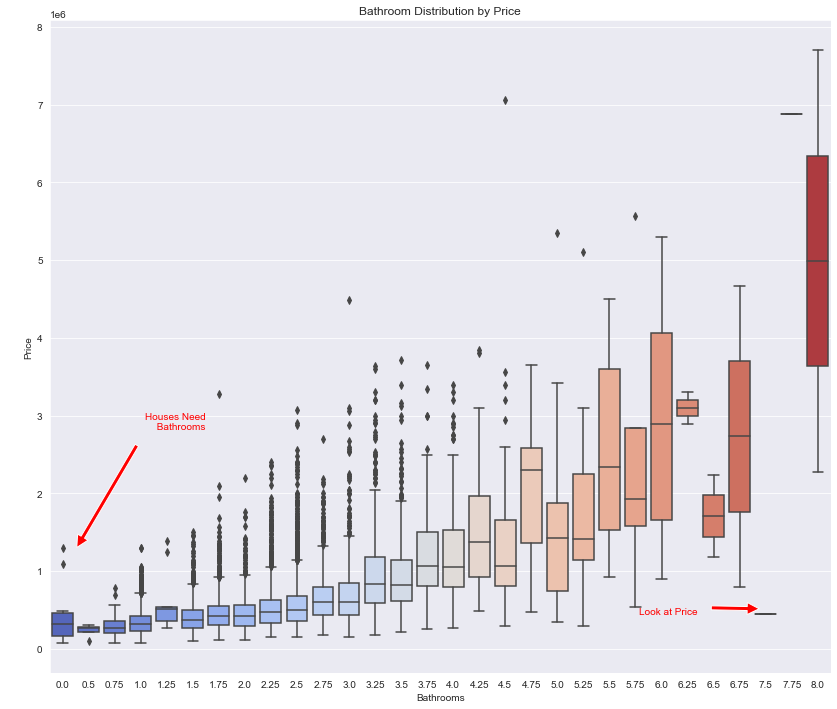

In [18]:
var = 'bathrooms'
fig, ax = plt.subplots(figsize=(14,12))
sns.boxplot(x=var, y="price", data=df_train, palette='coolwarm')
ax.annotate('Houses Need\n Bathrooms',color = 'r',
            xy=(70,150), xycoords='figure points',
            xytext=(.2, 0.4), textcoords='axes fraction',
            arrowprops=dict(facecolor='r', shrink=0.09),
            horizontalalignment='right', verticalalignment='top')
ax.annotate('Look at Price',color = 'r',
            xy=(770,100), xycoords='figure points',
            xytext=(.83, 0.1), textcoords='axes fraction',
            arrowprops=dict(facecolor='r', shrink=0.15),
            horizontalalignment='right', verticalalignment='top')
ax.set( xlabel='Bathrooms', ylabel='Price',
       title='Bathroom Distribution by Price')
plt.savefig('PNG/annotated_bathrooms_distribution.png', bbox_inches = 'tight',pad_inches = 0)

[(0.0, 5000000.0),
 Text(0, 0.5, 'Price'),
 Text(0.5, 0, 'Grade'),
 Text(0.5, 1.0, 'Grade vs Price')]

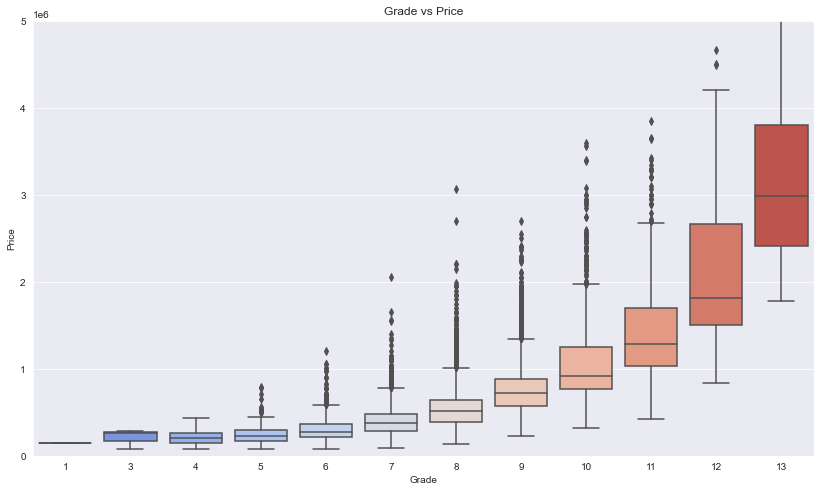

In [19]:
var = 'grade'
fig, ax = plt.subplots(figsize=(14, 8))
sns.boxplot(x=var, y="price", data=df_train, palette='coolwarm')
ax.set( xlabel='Grade', ylabel='Price',ylim = [0,5000000],
       title='Grade vs Price')

'ax.annotate("Skewness: %f" % (np.log(df_train[\'price\'])).skew(),color = \'k\',\n            xy=(800,130), xycoords=\'figure points\',\n            xytext=(.97, 0.87), textcoords=\'axes fraction\',\n            horizontalalignment=\'right\', verticalalignment=\'top\')\nax.annotate("Kurtosis: %f" % (np.log(df_train[\'price\'])).kurt(),color = \'k\',\n            xy=(800,130), xycoords=\'figure points\',\n            xytext=(.97, 0.81), textcoords=\'axes fraction\',\n            horizontalalignment=\'right\', verticalalignment=\'top\')'

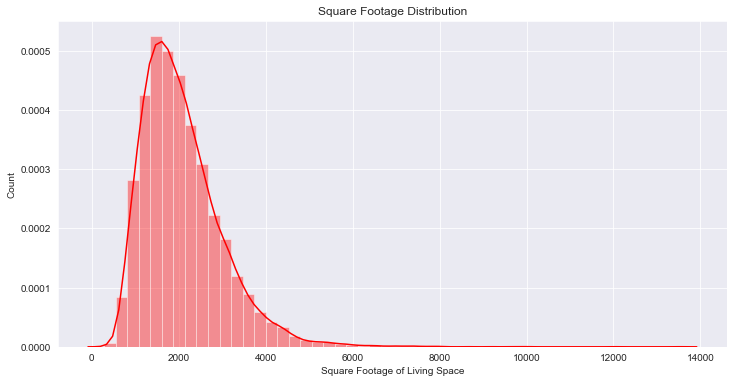

In [20]:
fig, ax = plt.subplots(figsize = (12,6))
sns.distplot(df_train['sqft_living'], bins=50, color = 'r')
ax.set( xlabel='Square Footage of Living Space', ylabel='Count',
       title='Square Footage Distribution')
"""ax.annotate("Skewness: %f" % (np.log(df_train['price'])).skew(),color = 'k',
            xy=(800,130), xycoords='figure points',
            xytext=(.97, 0.87), textcoords='axes fraction',
            horizontalalignment='right', verticalalignment='top')
ax.annotate("Kurtosis: %f" % (np.log(df_train['price'])).kurt(),color = 'k',
            xy=(800,130), xycoords='figure points',
            xytext=(.97, 0.81), textcoords='axes fraction',
            horizontalalignment='right', verticalalignment='top')"""
#plt.savefig('PNG/log_price_distribution.png', bbox_inches = 'tight',pad_inches = 0)

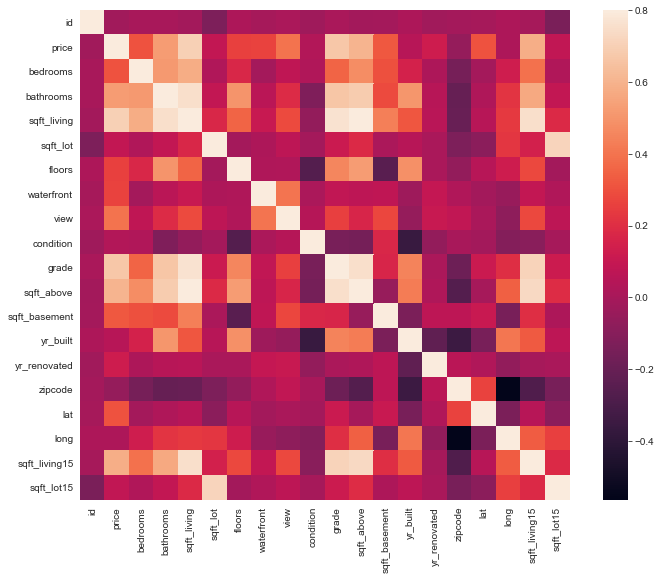

In [21]:
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

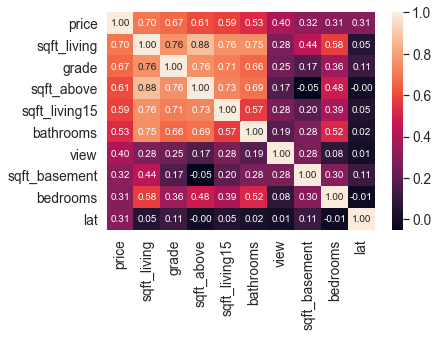

In [22]:
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'price')['price'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
sns.heatmap(cm, cbar=True, annot=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

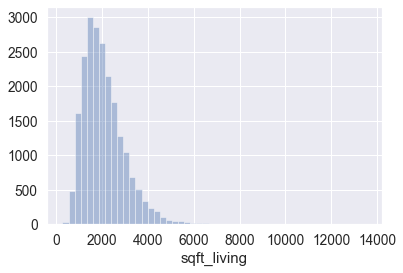

In [23]:
sns.distplot(df_train['sqft_living'], bins=50, kde=False)

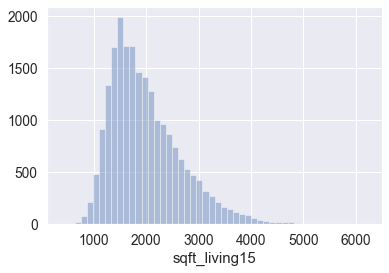

In [24]:
sns.distplot(df_train['sqft_living15'], bins=50, kde=False)

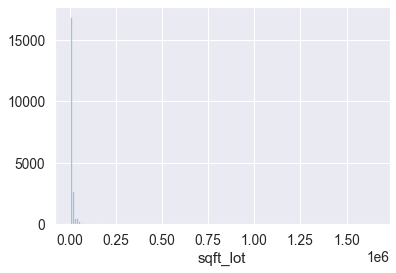

In [25]:
sns.distplot(df_train['sqft_lot'], bins=150, kde=False)

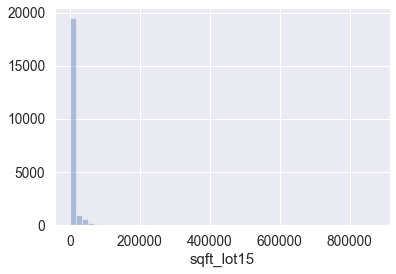

In [26]:
sns.distplot(df_train['sqft_lot15'], bins=50, kde=False)

# Data Cleaning


In [27]:
conditions = [(df_train['bedrooms'].eq(0)) & (df_train['sqft_living'].gt(2000)) & (df_train['bathrooms'].ge(2)),
              (df_train['bedrooms'].eq(0)) & (df_train['sqft_living'].gt(3000)) & (df_train['bathrooms'].ge(2)),
              (df_train['bedrooms'].eq(0)) & (df_train['sqft_living'].gt(1200)) & (df_train['bathrooms'].ge(2)),
              (df_train['bedrooms'].gt(9)) & (df_train['sqft_living'].gt(1500)) & (df_train['bathrooms'].ge(1.5))]

choices = [3,
           4,
           2,
           3]

df_train['bedrooms'] = np.select(conditions,choices,df_train['bedrooms'])

In [28]:
print('Top Lot Sizes:')
print(df_train.sqft_lot.sort_values(ascending = False).head())
print('\n')
print('Top House Sizes:')
print(df_train.sqft_living.sort_values(ascending = False).head())

Top Lot Sizes:
1719     1651359
17319    1164794
7647     1074218
7769     1024068
3949      982998
Name: sqft_lot, dtype: int64


Top House Sizes:
12777    13540
7252     12050
3914     10040
9254      9890
8092      9640
Name: sqft_living, dtype: int64


The house lots range much higher than the houses themselves.

# Feature Engineering

47.609862, -122.342056 are the coordinates of Pike Place Market

Using Pike Place as the proxy for city center.

In [29]:
from geopy.distance import geodesic
pike_place = (47.609862, -122.342056)
df_train['coords'] = tuple(zip(df_train['lat'],df_train['long']))
df_train['distance_from_pike'] = df_train['coords'].apply(lambda x: geodesic(pike_place,x))
df_train['distance_from_pike'] = df_train['distance_from_pike'].astype(str).str[:-3].astype(float)

In [30]:
df_train['yr_renovated'].value_counts()

0       20699
2014       91
2013       37
2003       36
2000       35
        ...  
1934        1
1959        1
1951        1
1948        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

The vast majority of the houses were never renovated.

In [31]:
df_train['yr_old'] = np.where(df_train['yr_renovated'].gt(0),2015-df_train['yr_renovated'],2015 - df_train['yr_built'])

In [32]:
# Now to take a look at the ratios of the houses to their lots

df_train['livlot_ratio'] = df_train['sqft_living'] / df_train['sqft_lot']
df_train['livlot_ratio15'] = df_train['sqft_living15'] / df_train['sqft_lot15']

In [33]:
df_train['residence'] = np.where((df_train['bedrooms'].gt(0)) & (df_train['bathrooms'].gt(0)),1,0)
#df_train.livlot_ratio.sort_values()

As you can see, the difference between the lot and house is substantial.
There has to be a trend, maybe these are not houses?


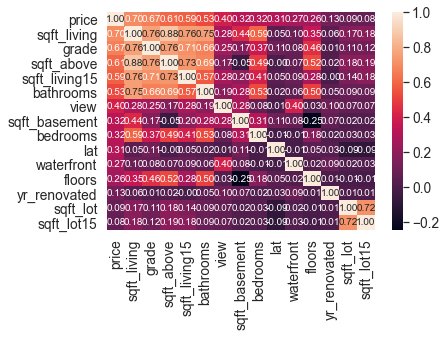

In [34]:
k = 15 #number of variables for heatmap
cols = corrmat.nlargest(k, 'price')['price'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
sns.heatmap(cm, cbar=True, annot=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()


# Modeling

In [53]:
# import some of the packages I need

from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(drop='first')
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
reg = LinearRegression()


from sklearn import ensemble, tree, linear_model
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error


In [40]:
X = df_train.drop(columns=['price','coords','id','date'])
y = df_train['price']
#X.head()
y.head()

0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64

## Polynomials Dataframe

In [45]:

df_poly = X
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_data = poly.fit_transform(X) # Best Columns from KBest Above
poly_columns = poly.get_feature_names(X.columns)
df_poly_train = pd.DataFrame(poly_data, columns=poly_columns)
df_poly_train.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,distance_from_pike,yr_old,livlot_ratio,livlot_ratio15,residence,bedrooms^2,bedrooms bathrooms,bedrooms sqft_living,bedrooms sqft_lot,bedrooms floors,bedrooms waterfront,bedrooms view,bedrooms condition,bedrooms grade,bedrooms sqft_above,bedrooms sqft_basement,bedrooms yr_built,bedrooms yr_renovated,bedrooms zipcode,bedrooms lat,bedrooms long,bedrooms sqft_living15,bedrooms sqft_lot15,bedrooms distance_from_pike,bedrooms yr_old,bedrooms livlot_ratio,bedrooms livlot_ratio15,bedrooms residence,bathrooms^2,bathrooms sqft_living,bathrooms sqft_lot,bathrooms floors,bathrooms waterfront,bathrooms view,bathrooms condition,bathrooms grade,bathrooms sqft_above,bathrooms sqft_basement,bathrooms yr_built,bathrooms yr_renovated,bathrooms zipcode,bathrooms lat,bathrooms long,bathrooms sqft_living15,bathrooms sqft_lot15,bathrooms distance_from_pike,bathrooms yr_old,bathrooms livlot_ratio,bathrooms livlot_ratio15,bathrooms residence,sqft_living^2,sqft_living sqft_lot,sqft_living floors,sqft_living waterfront,sqft_living view,sqft_living condition,sqft_living grade,sqft_living sqft_above,sqft_living sqft_basement,sqft_living yr_built,sqft_living yr_renovated,sqft_living zipcode,sqft_living lat,sqft_living long,sqft_living sqft_living15,sqft_living sqft_lot15,sqft_living distance_from_pike,sqft_living yr_old,sqft_living livlot_ratio,sqft_living livlot_ratio15,sqft_living residence,sqft_lot^2,sqft_lot floors,sqft_lot waterfront,sqft_lot view,sqft_lot condition,sqft_lot grade,sqft_lot sqft_above,sqft_lot sqft_basement,sqft_lot yr_built,sqft_lot yr_renovated,sqft_lot zipcode,sqft_lot lat,sqft_lot long,sqft_lot sqft_living15,sqft_lot sqft_lot15,sqft_lot distance_from_pike,sqft_lot yr_old,sqft_lot livlot_ratio,sqft_lot livlot_ratio15,sqft_lot residence,floors^2,floors waterfront,floors view,floors condition,floors grade,floors sqft_above,floors sqft_basement,floors yr_built,floors yr_renovated,floors zipcode,floors lat,floors long,floors sqft_living15,floors sqft_lot15,floors distance_from_pike,floors yr_old,floors livlot_ratio,floors livlot_ratio15,floors residence,waterfront^2,waterfront view,waterfront condition,waterfront grade,waterfront sqft_above,waterfront sqft_basement,waterfront yr_built,waterfront yr_renovated,waterfront zipcode,waterfront lat,waterfront long,waterfront sqft_living15,waterfront sqft_lot15,waterfront distance_from_pike,waterfront yr_old,waterfront livlot_ratio,waterfront livlot_ratio15,waterfront residence,view^2,view condition,view grade,view sqft_above,view sqft_basement,view yr_built,view yr_renovated,view zipcode,view lat,view long,view sqft_living15,view sqft_lot15,view distance_from_pike,view yr_old,view livlot_ratio,view livlot_ratio15,view residence,condition^2,condition grade,condition sqft_above,condition sqft_basement,condition yr_built,condition yr_renovated,condition zipcode,condition lat,condition long,condition sqft_living15,condition sqft_lot15,condition distance_from_pike,condition yr_old,condition livlot_ratio,condition livlot_ratio15,condition residence,grade^2,grade sqft_above,grade sqft_basement,grade yr_built,grade yr_renovated,grade zipcode,grade lat,grade long,grade sqft_living15,grade sqft_lot15,grade distance_from_pike,grade yr_old,grade livlot_ratio,grade livlot_ratio15,grade residence,sqft_above^2,sqft_above sqft_basement,sqft_above yr_built,sqft_above yr_renovated,sqft_above zipcode,sqft_above lat,sqft_above long,sqft_above sqft_living15,sqft_above sqft_lot15,sqft_above distance_from_pike,sqft_above yr_old,sqft_above livlot_ratio,sqft_above livlot_ratio15,sqft_above residence,sqft_basement^2,sqft_basement yr_built,sqft_basement yr_renovated,sqft_basement zipcode,sqft_basement lat,sqft_basement long,sqft_basement sqft_living15,sqft_basement sqft_lot15,sqft_basement distance_from_pike,sqft_basement yr_old,sqft_basement livlot_rati

Train Test Split the Poly DF and the Normal DF

In [48]:
x_poly_train, x_poly_test, y_poly_train, y_poly_test = train_test_split(df_poly_train, y, random_state=42, test_size = 0.2)

In [50]:
print(x_poly_train.shape)
print(y_poly_train.shape)
print(x_poly_test.shape)
print(y_poly_test.shape)

(17290, 299)
(17290,)
(4323, 299)
(4323,)


In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.2)

In [51]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(17290, 23)
(17290,)
(4323, 23)
(4323,)


Start the Linear Regression Model

In [56]:
# normal dataframe linear regression

reg.fit(X_train, y_train)
y_train_pred_gb =  reg.predict(X_train)
y_pred_gb = reg.predict(X_test)
train_r2 = r2_score(y_train, y_train_pred_gb)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred_gb))
test_r2 = r2_score(y_test, y_pred_gb)
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_gb))
print('Train R^2: ' + str(train_r2))
print('Training Error: '+ str(train_rmse))
print('Test R^2: ' + str(test_r2))
print('Testing Error: '+ str(test_rmse))

Train R^2: 0.7326051442230692
Training Error: 186908.4461220666
Test R^2: 0.7308434331608231
Testing Error: 201718.13219710722


In [65]:
reg.fit(x_poly_train, y_poly_train)
y_poly_train_pred_gb =  reg.predict(x_poly_train)
y_poly_pred_gb = reg.predict(x_poly_test)
train_r2 = r2_score(y_poly_train, y_poly_train_pred_gb)
train_rmse = np.sqrt(mean_squared_error(y_poly_train, y_poly_train_pred_gb))
test_r2 = r2_score(y_poly_test, y_poly_pred_gb)
test_rmse = np.sqrt(mean_squared_error(y_poly_test, y_poly_pred_gb))
print('Train R^2: ' + str(train_r2))
print('Training Error: '+ str(train_rmse))
print('Test R^2: ' + str(test_r2))
print('Testing Error: '+ str(test_rmse))

Train R^2: 0.8815523229012743
Training Error: 124398.6527866538
Test R^2: -3318.102258514476
Testing Error: 22400244.799700867


## Instantiate Elastic Net CV

In [58]:
ENTest = linear_model.ElasticNetCV(
    alphas=[0.0001, 0.0005, 0.001,
            0.01, 0.1, 1, 10], l1_ratio=[.01,
                                         .1, .5, .9, .99], max_iter=5000).fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:470: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 309337115187011.6, tolerance: 172804433316.8169
  model = cd_fast.enet_coordinate_descent_gram(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:470: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 282987384824346.5, tolerance: 172804433316.8169
  model = cd_fast.enet_coordinate_descent_gram(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:470: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 253972320109646.5, tolerance: 172804433316.8169
  model = cd_fast.enet_coordinate_des

In [60]:
ENTest.fit(X_train, y_train)
y_train_pred_gb =  ENTest.predict(X_train)
y_pred_gb = ENTest.predict(X_test)

train_r2 = r2_score(y_train, y_train_pred_gb)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred_gb))
test_r2 = r2_score(y_test, y_pred_gb)
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_gb))
print('Train R^2: ' + str(train_r2))
print('Training Error: '+ str(train_rmse))
print('Test R^2: ' + str(test_r2))
print('Testing Error: '+ str(test_rmse))

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:470: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 309337115187011.6, tolerance: 172804433316.8169
  model = cd_fast.enet_coordinate_descent_gram(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:470: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 282987384824346.5, tolerance: 172804433316.8169
  model = cd_fast.enet_coordinate_descent_gram(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:470: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 253972320109646.5, tolerance: 172804433316.8169
  model = cd_fast.enet_coordinate_des

Train R^2: 0.7325967080998147
Training Error: 186911.39451508597
Test R^2: 0.7308064078665718
Testing Error: 201732.00593694815


In [61]:
ENTest.fit(x_poly_train, y_poly_train)
y_poly_train_pred_gb =  ENTest.predict(x_poly_train)
y_poly_pred_gb = ENTest.predict(x_poly_test)

train_r2 = r2_score(y_poly_train, y_poly_train_pred_gb)
train_rmse = np.sqrt(mean_squared_error(y_poly_train, y_poly_train_pred_gb))
test_r2 = r2_score(y_poly_test, y_poly_pred_gb)
test_rmse = np.sqrt(mean_squared_error(y_poly_test, y_poly_pred_gb))
print('Train R^2: ' + str(train_r2))
print('Training Error: '+ str(train_rmse))
print('Test R^2: ' + str(test_r2))
print('Testing Error: '+ str(test_rmse))

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:470: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 128384115723620.97, tolerance: 172804433316.8169
  model = cd_fast.enet_coordinate_descent_gram(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:470: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 127005224246397.5, tolerance: 172804433316.8169
  model = cd_fast.enet_coordinate_descent_gram(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:470: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 125985126375547.14, tolerance: 172804433316.8169
  model = cd_fast.enet_coordinate_d

Train R^2: 0.8582175759042374
Training Error: 136101.71623664087
Test R^2: 0.8270254337183482
Testing Error: 161708.76981325354


## Instantiate the Gradient Boosting Regressor

In [62]:
GBest = ensemble.GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05, max_depth=3, max_features='sqrt',
                                               min_samples_leaf=15, min_samples_split=10, loss='huber').fit(X_train, y_train)

In [63]:
GBest.fit(X_train, y_train)
y_train_pred_gb =  GBest.predict(X_train)
y_pred_gb = GBest.predict(X_test)

train_r2 = r2_score(y_train, y_train_pred_gb)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred_gb))
test_r2 = r2_score(y_test, y_pred_gb)
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_gb))
print('Train R^2: ' + str(train_r2))
print('Training Error: '+ str(train_rmse))
print('Test R^2: ' + str(test_r2))
print('Testing Error: '+ str(test_rmse))

Train R^2: 0.9415794344750861
Training Error: 87364.55746158339
Test R^2: 0.9059594705019837
Testing Error: 119233.96356912763


In [64]:
GBest.fit(x_poly_train, y_poly_train)
y_poly_train_pred_gb =  GBest.predict(x_poly_train)
y_poly_pred_gb = GBest.predict(x_poly_test)

train_r2 = r2_score(y_poly_train, y_poly_train_pred_gb)
train_rmse = np.sqrt(mean_squared_error(y_poly_train, y_poly_train_pred_gb))
test_r2 = r2_score(y_poly_test, y_poly_pred_gb)
test_rmse = np.sqrt(mean_squared_error(y_poly_test, y_poly_pred_gb))
print('Train R^2: ' + str(train_r2))
print('Training Error: '+ str(train_rmse))
print('Test R^2: ' + str(test_r2))
print('Testing Error: '+ str(test_rmse))


Train R^2: 0.9551055957223815
Training Error: 76585.84519418984
Test R^2: 0.8966583094058871
Testing Error: 124991.42779840271


These are the three models I've trained for the project. As you can tell, one is a lot
more powerful than the other.

The winner was Gradient Boosting working on the normal dataframe with an RMSE score of 119233.96356912763